In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def function1(vec):
    assert(len(vec) == 1)
    
    copy = vec.copy()
    
    return copy


def function2(vec):
    assert(len(vec) == 1)
    
    copy = vec.copy()
    
    copy[0] = (-1) * vec[0]
    
    return copy


def function3(vec):
    assert(len(vec) == 2)
    
    copy = vec.copy()
    
    x, y = vec
    
    copy[0] = + y
    copy[1] = - x

    return copy


a = 0.2
b = 0.2
c = 5.7

def function4(vec):
    assert(len(vec) == 3)
    
    copy = vec.copy()
    
    x, y, z = vec
    
    copy[0] = -y - z
    copy[1] = x + a*y
    copy[2] = b + z*(x-c)
    
    return copy

In [3]:
# x - vector, f(x), h
def EulerM(vec, f, h):
    
    return vec + f(vec.copy()) * h

In [4]:
def RK4M(vec, f, h):
    
    a1 = vec.copy()
    k1 = f(a1)
    
    a2 = vec.copy() + k1 * h / 2
    k2 = f(a2)
    
    a3 = vec.copy() + k2 * h / 2
    k3 = f(a3)
    
    a4 = vec.copy() + k3 * h
    k4 = f(a4)
    
    return vec + (k1 + 2 * k2 + 2 * k3 + k4) * h / 6

In [5]:
# method(vec, f, h)
# function(vec)
# origin(t)
def run(method, function, origin, dims, x0, h, t_max):
    tarr = []
    xarr = []
    earr = []
    
    vec = x0 * np.ones(dims)
    
    for t in np.arange(1e-5, t_max + h, h):
        
        vec = method(vec, function, h)

        x = vec[0]

        tarr.append(t)
        xarr.append(vec)
        
        earr.append(math.fabs(x0*origin(t) - x))
    
    return (tarr, xarr, earr)

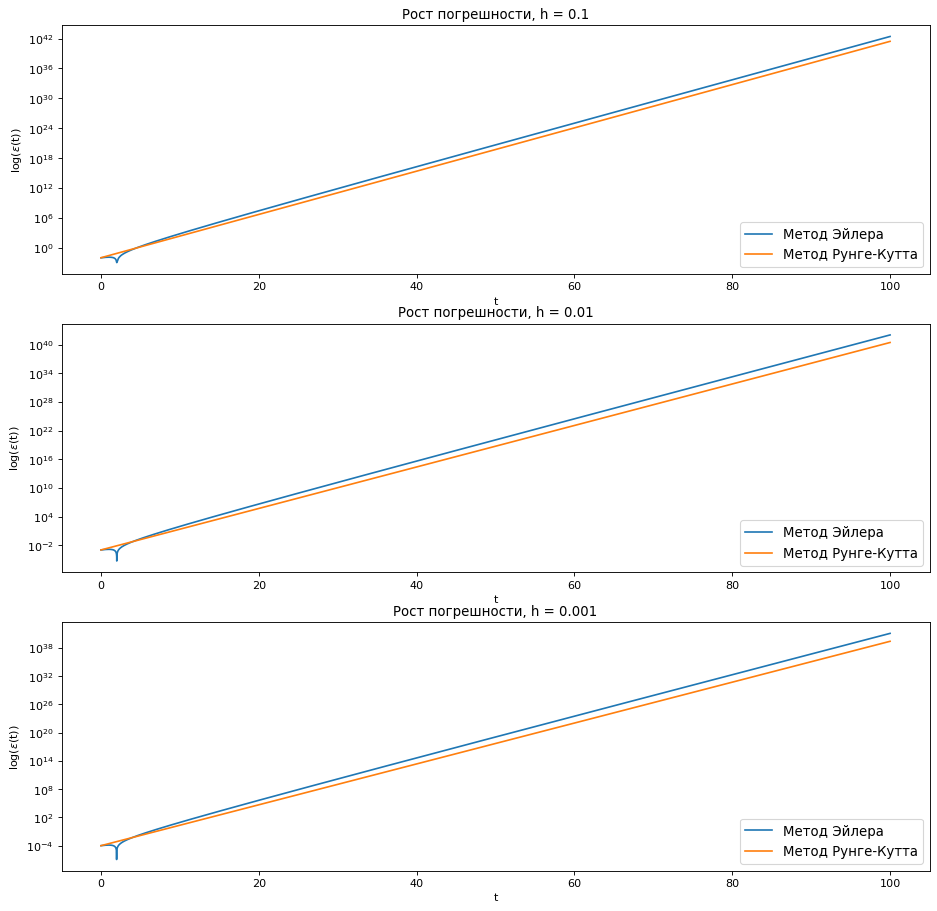

In [6]:
fig, ax = plt.subplots(3,1, figsize=(14,14), dpi=80)

# точное решение
origin = lambda t: np.exp(t)

# функция для численного решения
numeric = function1

for index, h_step in enumerate([0.1, 0.01, 0.001]):
    ax[index].set(title='Рост погрешности, h = '+str(h_step), xlabel=r't', ylabel=r'log($\epsilon$(t))', yscale = 'log')
    
    t1,x1,e1 = run(EulerM, numeric, origin, dims = 1, x0 = 0.1, h = h_step, t_max = 100)
    t2,x2,e2 = run(RK4M,   numeric, origin, dims = 1, x0 = 0.1, h = h_step, t_max = 100)

    ax[index].plot(t1, e1, label='Метод Эйлера')
    ax[index].plot(t2, e2, label='Метод Рунге-Кутта')
    
    ax[index].legend(prop={'size': 12}, loc='lower right')

pass

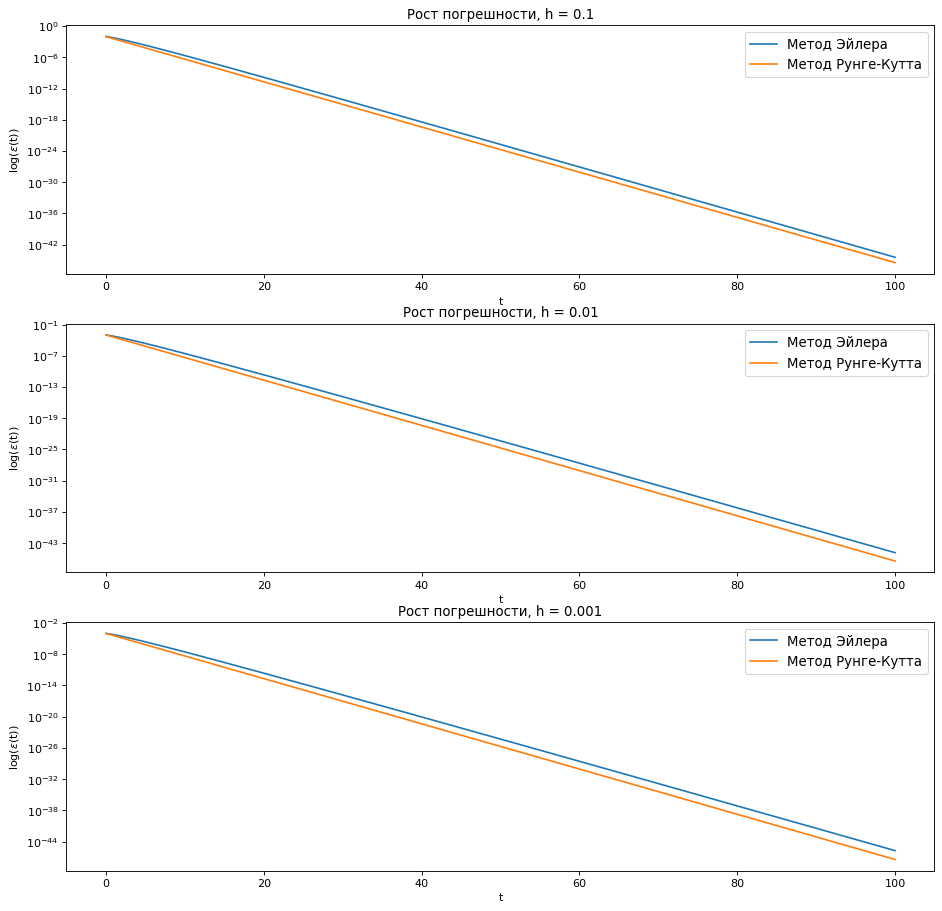

In [7]:
fig, ax = plt.subplots(3,1, figsize=(14,14), dpi=80)

# точное решение
origin = lambda t: np.exp(-t)

# функция для численного решения
numeric = function2

for index, h_step in enumerate([0.1, 0.01, 0.001]):
    ax[index].set(title='Рост погрешности, h = '+str(h_step), xlabel=r't', ylabel=r'log($\epsilon$(t))', yscale = 'log')
    
    t1,x1,e1 = run(EulerM, numeric, origin, dims = 1, x0 = 0.1, h = h_step, t_max = 100)
    t2,x2,e2 = run(RK4M,   numeric, origin, dims = 1, x0 = 0.1, h = h_step, t_max = 100)

    ax[index].plot(t1, e1, label='Метод Эйлера')
    ax[index].plot(t2, e2, label='Метод Рунге-Кутта')
    
    ax[index].legend(prop={'size': 12}, loc='upper right')
    
pass

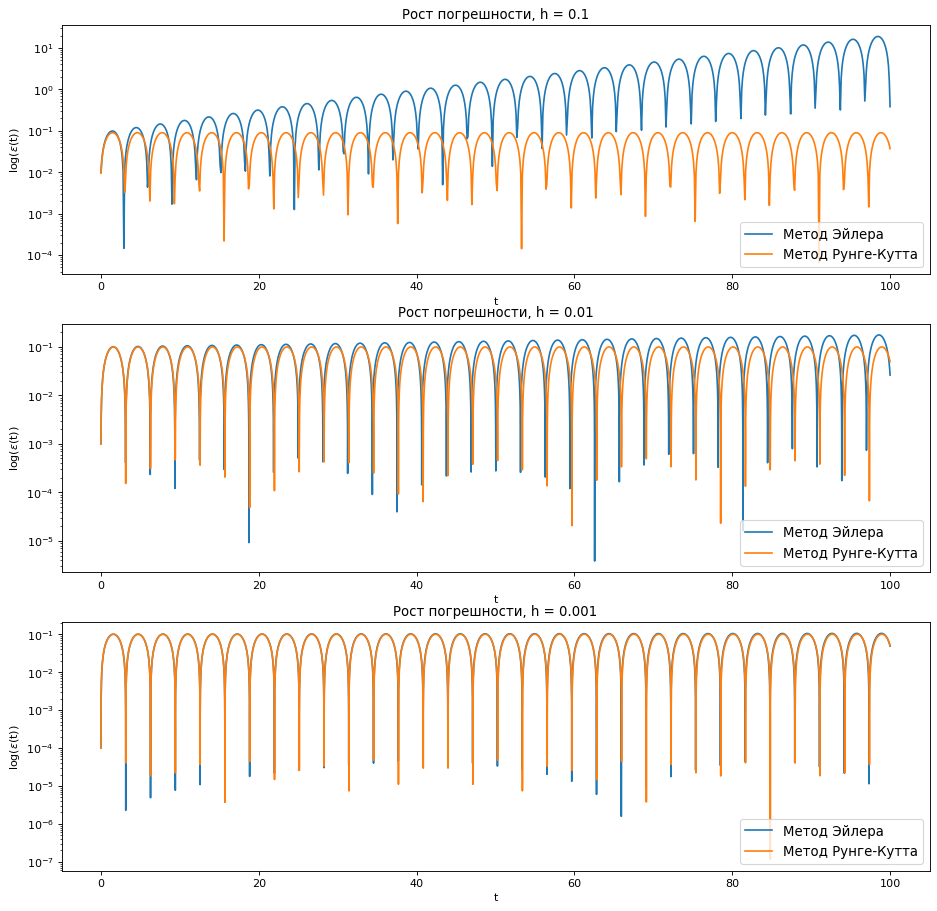

In [8]:
fig, ax = plt.subplots(3,1, figsize=(14,14), dpi=80)

# точное решение
origin = lambda t: math.cos(t)

# функция для численного решения
numeric = function3

for index, h_step in enumerate([0.1, 0.01, 0.001]):
    ax[index].set(title='Рост погрешности, h = '+str(h_step), xlabel=r't', ylabel=r'log($\epsilon$(t))', yscale = 'log')
    
    t1,x1,e1 = run(EulerM, numeric, origin, dims = 2, x0 = 0.1, h = h_step, t_max = 100)
    t2,x2,e2 = run(RK4M,   numeric, origin, dims = 2, x0 = 0.1, h = h_step, t_max = 100)

    ax[index].plot(t1, e1, label='Метод Эйлера')
    ax[index].plot(t2, e2, label='Метод Рунге-Кутта')
    
    ax[index].legend(prop={'size': 12}, loc='lower right')
    
pass

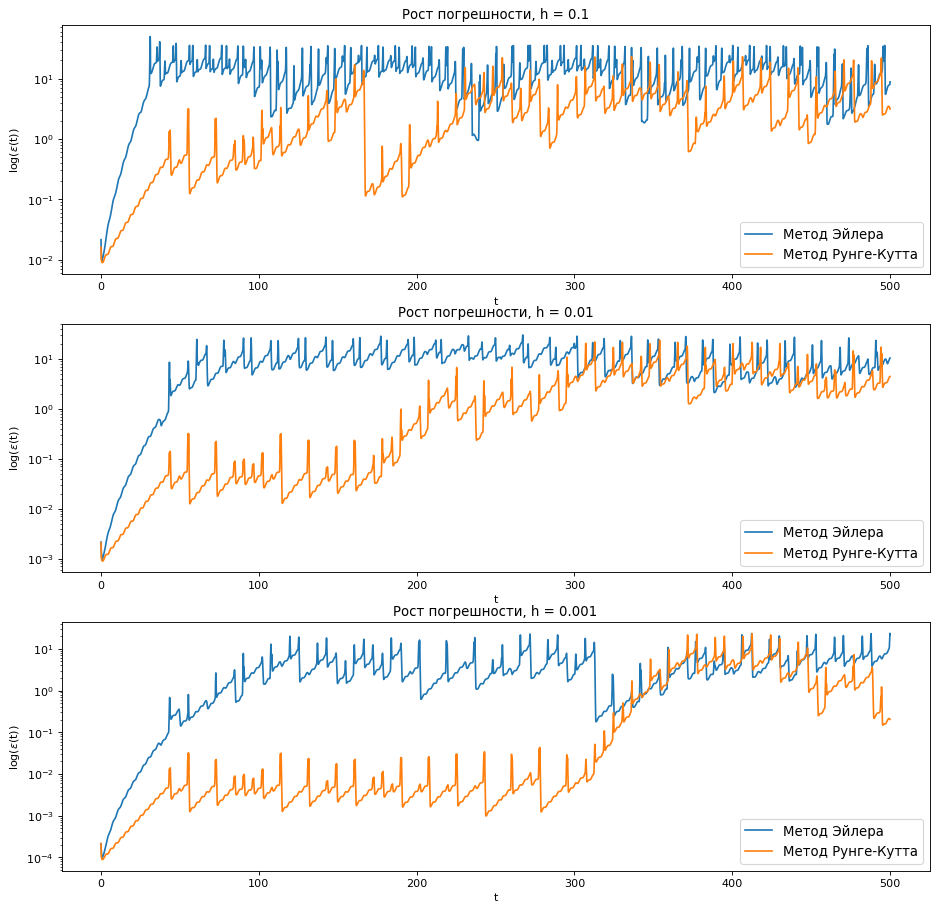

In [9]:
fig, ax = plt.subplots(3,1, figsize=(14,14), dpi=80)

# точное решение
origin = lambda t: 0

# функция для численного решения
numeric = function4

for index, h_step in enumerate([0.1, 0.01, 0.001]):
    ax[index].set(title='Рост погрешности, h = '+str(h_step), xlabel=r't', ylabel=r'log($\epsilon$(t))', yscale = 'log')
    
    t1,x1,e1 = run(EulerM, numeric, origin, dims = 3, x0 = 0.1, h = h_step / 1, t_max = 500)
    t2,x2,e2 = run(EulerM, numeric, origin, dims = 3, x0 = 0.1, h = h_step / 2, t_max = 500)
    
    t3,x3,e3 = run(RK4M,   numeric, origin, dims = 3, x0 = 0.1, h = h_step / 1, t_max = 500)
    t4,x4,e4 = run(RK4M,   numeric, origin, dims = 3, x0 = 0.1, h = h_step / 2, t_max = 500)
    
    x12 = [0] * len(x1) 
    x34 = [0] * len(x3)
    
    for i in range(0, len(x1)):
        
        x12[i] = 0
        
        for j in range(0, 3):
            x12[i] += (x1[i][j] - x2[i * 2][j])**2
        
        x12[i] = math.sqrt(x12[i])
        
        x34[i] = 0
        
        for j in range(0, 3):
            x34[i] += (x3[i][j] - x4[i * 2][j])**2
        
        x34[i] = math.sqrt(x34[i])
    
    ax[index].plot(t1, x12, label='Метод Эйлера')
    ax[index].plot(t3, x34, label='Метод Рунге-Кутта')
    
    ax[index].legend(prop={'size': 12}, loc='lower right')
    
pass